In [802]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf

In [803]:
data_url = "data/superconaditivo.csv"
data = pd.read_csv(data_url)

In [804]:
train_size = int(len(data) * 0.7)
train_airPas = data[0:train_size]
test_airPas = data[train_size:len(data)]

In [805]:
# Display basic information about the dataset
print("Dataset Summary:")
print(data.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MES/AÑO      13 non-null     object 
 1   Unnamed: 1   2 non-null      float64
 2   2001         11 non-null     float64
 3   2002         13 non-null     float64
 4   2003         13 non-null     float64
 5   2004         13 non-null     float64
 6   Unnamed: 6   0 non-null      float64
 7   2005         13 non-null     float64
 8   2006         13 non-null     float64
 9   2007         13 non-null     float64
 10  2008         13 non-null     float64
 11  2009         13 non-null     float64
 12  2010         13 non-null     float64
 13  2011         13 non-null     float64
 14  2012         13 non-null     float64
 15  2013         13 non-null     float64
 16  2014         13 non-null     float64
 17  2015         13 non-null     float64
 18  2016         13 non-null     float6

In [806]:
# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   MES/AÑO  Unnamed: 1   2001   2002   2003   2004  Unnamed: 6   2005   2006  \
0    ENERO         NaN  14.92  13.37  16.34  16.80         NaN  19.80  23.31   
1  FEBRERO         NaN  15.17  13.23  17.21  18.05         NaN  19.25  22.98   
2    MARZO         NaN  14.97  13.63  18.30  18.68         NaN  20.46  22.85   
3    ABRIL         NaN  14.91  15.18  17.42  19.16         NaN  22.70  25.36   
4     MAYO         NaN  16.26  15.19  16.48  19.48         NaN  23.21  27.68   

    2007  ...   2016   2017   2018   2019   2020   2021   2022   2023  \
0  23.62  ...  21.01  25.31  26.47  23.72  26.17  24.34  32.05  35.76   
1  22.65  ...  20.03  24.51  26.27  24.54  25.12  26.07  34.55  35.54   
2  24.00  ...  21.70  24.03  26.43  26.49  24.15  28.24  39.83  34.95   
3  26.35  ...  22.91  24.81  27.74  28.48  19.44  28.54  39.37  36.87   
4  28.40  ...  23.75  24.24  28.57  28.54  19.36  29.41  42.68  35.43   

   Unnamed: 26  Unnamed: 27  
0          NaN      

In [807]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Unnamed: 1       2001       2002       2003       2004  Unnamed: 6  \
count    2.000000  11.000000  13.000000  13.000000  13.000000         0.0   
mean    14.315000  15.194545  15.301538  16.750000  19.416923         NaN   
std      1.053589   0.600506   1.228996   0.774672   1.104192         NaN   
min     13.570000  14.430000  13.230000  15.580000  16.800000         NaN   
25%     13.942500  14.915000  15.050000  16.340000  19.160000         NaN   
50%     14.315000  14.950000  15.300000  16.750000  19.510000         NaN   
75%     14.687500  15.350000  16.310000  17.210000  19.900000         NaN   
max     15.060000  16.310000  16.750000  18.300000  21.030000         NaN   

            2005       2006       2007       2008  ...       2016       2017  \
count  13.000000  13.000000  13.000000  13.000000  ...  13.000000  13.000000   
mean   23.272308  25.547692  27.253846  32.172308  ...  22.926154  24.813077   
std     2.506569   2.067173   2.388834   3.96

In [808]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
MES/AÑO         0
Unnamed: 1     11
2001            2
2002            0
2003            0
2004            0
Unnamed: 6     13
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            7
Unnamed: 26    13
Unnamed: 27    13
dtype: int64


In [809]:
# Create a list of columns to drop
columns_to_drop = ["Unnamed: 1", "Unnamed: 6", "Unnamed: 26", "Unnamed: 27"]

# Drop the columns from the DataFrame
data_cleaned = data.drop(columns=columns_to_drop)

In [810]:
data_cleaned['2001'].fillna(method='ffill', inplace=True)
data_cleaned['2023'].fillna(method='ffill', inplace=True)

In [811]:
# Check for missing values
print("\nMissing Values:")
print(data_cleaned.isnull().sum())


Missing Values:
MES/AÑO    0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64


In [812]:
fechas = []
precios = []

for i in range(1, 24):
    for j in range(0, 12):
        fechas.append(str(data_cleaned.columns[i]) + "-" + str(j+1).zfill(2))
        precios.append(data_cleaned.iloc[j, i])

data_transformation = pd.DataFrame({'Fecha': fechas, 'Precio': precios})

print(data_transformation)

       Fecha  Precio
0    2001-01   14.92
1    2001-02   15.17
2    2001-03   14.97
3    2001-04   14.91
4    2001-05   16.26
..       ...     ...
271  2023-08   35.43
272  2023-09   35.43
273  2023-10   35.43
274  2023-11   35.43
275  2023-12   35.43

[276 rows x 2 columns]


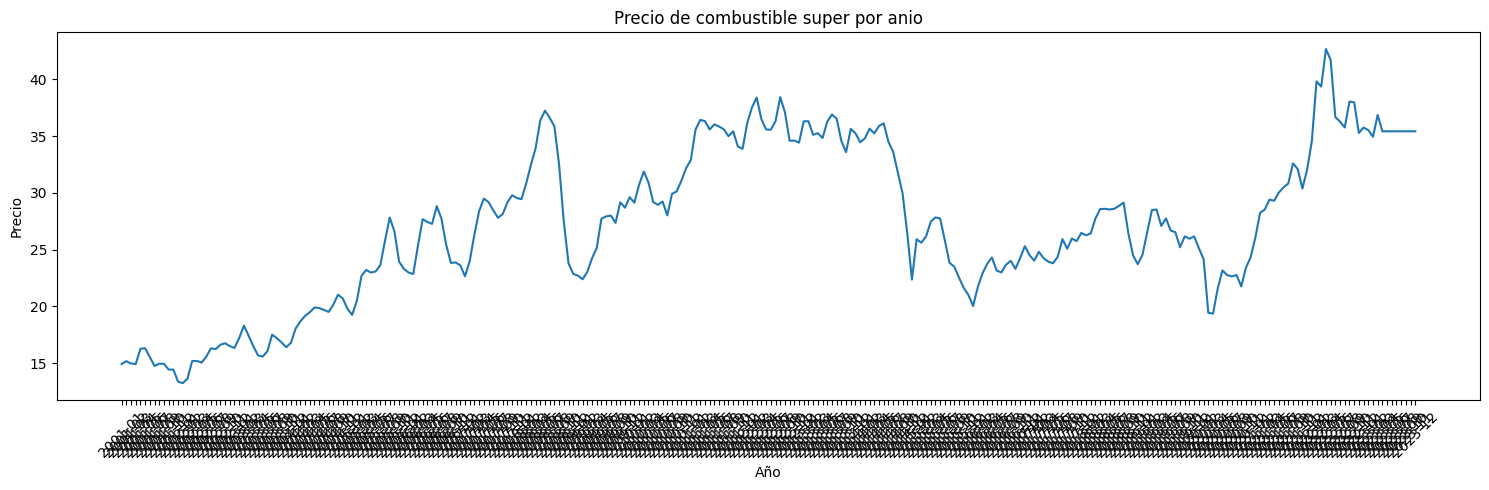

In [813]:
# plt.plot(data_transformation)
# plt.gca().set(title="Precio de combustible super por mes", xlabel="Año", ylabel="Precio")
# plt.show()
plt.plot(data_transformation['Fecha'], data_transformation['Precio'])
plt.gca().set(title="Precio de combustible super por anio", xlabel="Año", ylabel="Precio")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout for better spacing
plt.show()

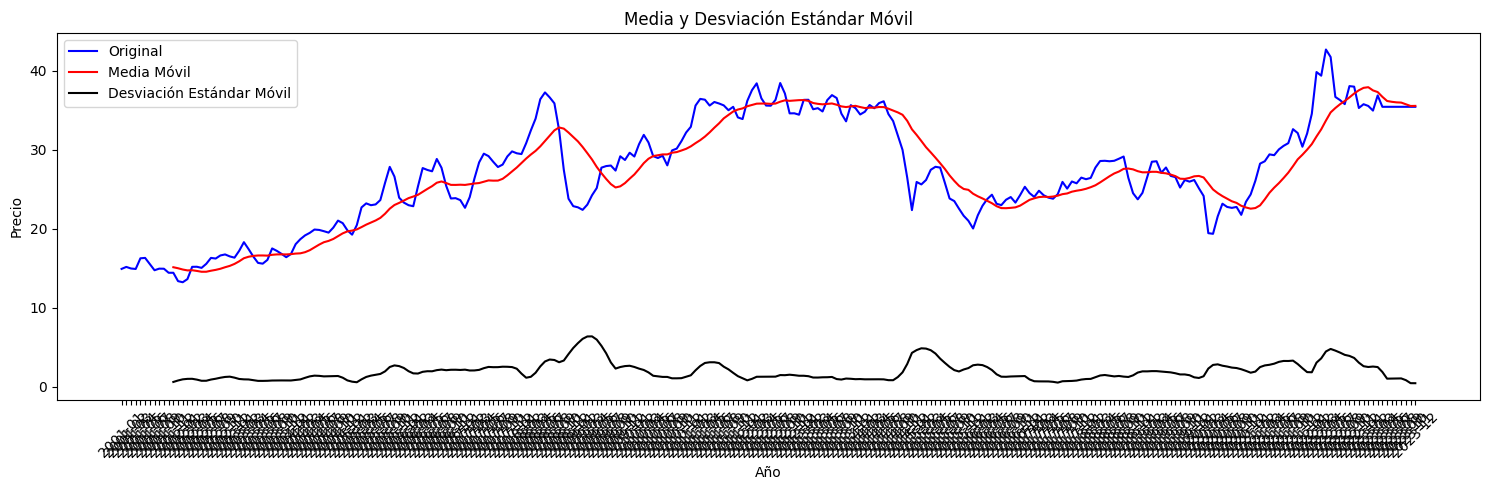

In [814]:
mediaMovil = data_transformation['Precio'].rolling(window=12).mean()
deMovil = data_transformation['Precio'].rolling(window=12).std()

# Plotting the results
plt.plot(data_transformation['Fecha'], data_transformation['Precio'], color="blue", label="Original")
plt.plot(data_transformation['Fecha'], mediaMovil, color='red', label='Media Móvil')
plt.plot(data_transformation['Fecha'], deMovil, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title('Media y Desviación Estándar Móvil')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [815]:
# descomposicion = seasonal_decompose(data_transformation)
# descomposicion.plot()

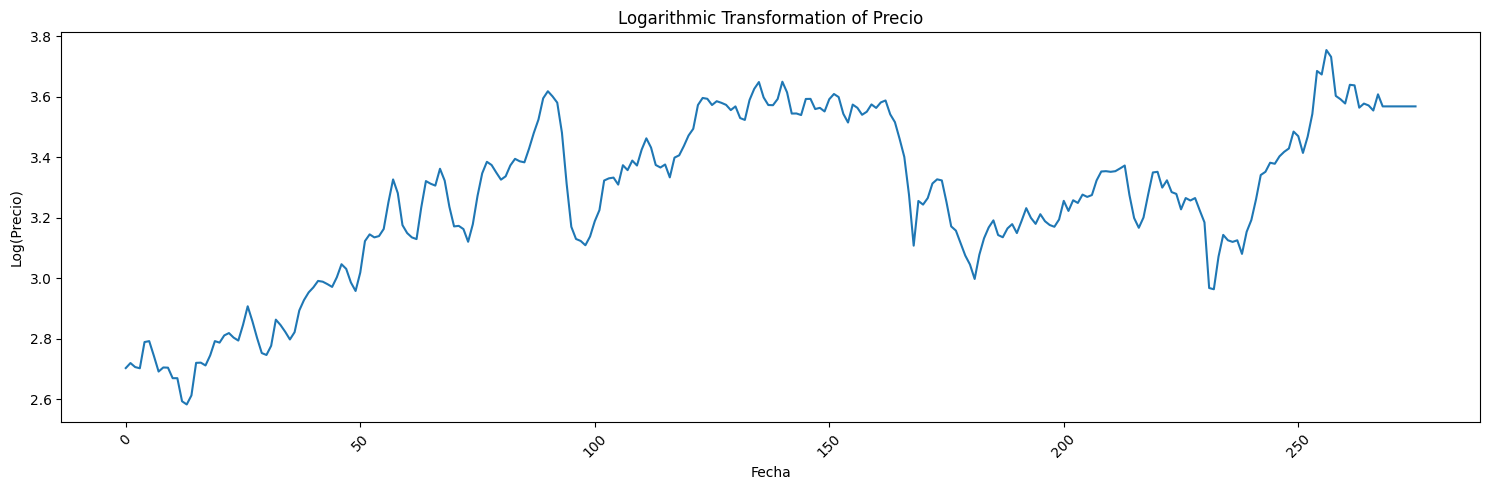

In [816]:
data_transformation['Precio_Log'] = np.log(data_transformation['Precio'])
data_transformation_log = np.log(data_transformation['Precio'])
plt.plot(data_transformation.index, data_transformation['Precio_Log'])
plt.gca().set(title="Logarithmic Transformation of Precio", xlabel="Fecha", ylabel="Log(Precio)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [817]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(data_transformation['Precio'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)' % key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -1.963654
p-value                        0.302733
# de retardos usados          10.000000
# de observaciones usadas    265.000000
Critical Value (1%)           -3.455270
Critical Value (5%)           -2.872509
Critical Value (10%)          -2.572615
dtype: float64


In [818]:
non_numeric_rows = data_transformation[~data_transformation['Precio'].apply(pd.to_numeric, errors='coerce').notnull()]
print(non_numeric_rows)


Empty DataFrame
Columns: [Fecha, Precio, Precio_Log]
Index: []


In [819]:
data_transformation['Fecha'] = pd.to_datetime(data_transformation['Fecha'], errors='coerce')
data_transformation['Fecha'] = data_transformation['Fecha'].sub(pd.Timestamp('1970-01-01')).dt.days


In [820]:
data_transformation_diff = data_transformation['Precio'].diff()
data_transformation_diff.dropna(inplace=True)
dfTest = adfuller(data_transformation_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key, value in dfTest[4].items():
    salidaDf['Critical Value (%s)' % key] = value
print(salidaDf)

Estadístico de prueba       -5.677884e+00
p-value                      8.620442e-07
# de retardos usados         9.000000e+00
# de observaciones usadas    2.650000e+02
Critical Value (1%)         -3.455270e+00
Critical Value (5%)         -2.872509e+00
Critical Value (10%)        -2.572615e+00
dtype: float64


In [821]:
data_transformation_diff = data_transformation_diff.diff()
data_transformation_diff.dropna(inplace=True)
dfTest = adfuller(data_transformation_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Estadístico de prueba       -8.378527e+00
p-value                      2.547137e-13
# de retardos usados         1.300000e+01
# de observaciones usadas    2.600000e+02
Critical Value (1%)         -3.455754e+00
Critical Value (5%)         -2.872721e+00
Critical Value (10%)        -2.572728e+00
dtype: float64


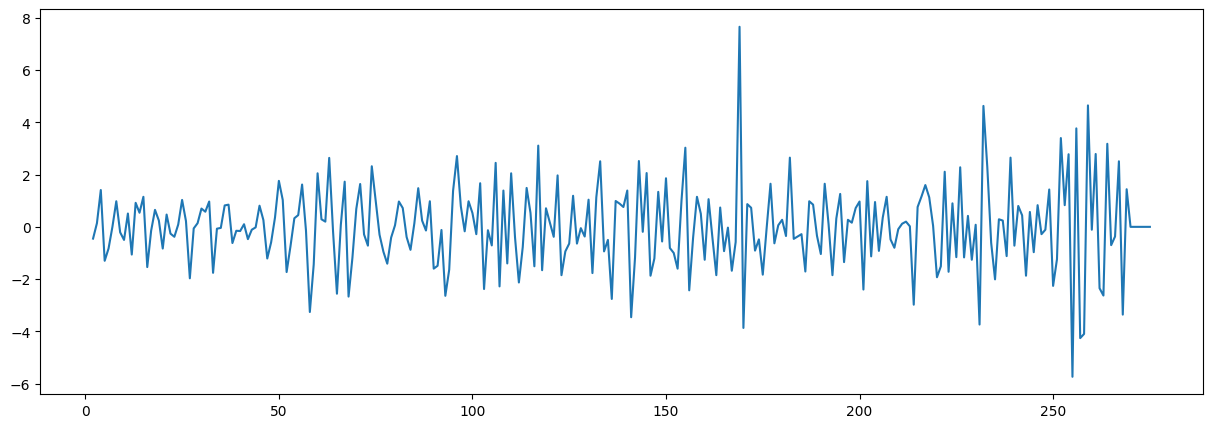

In [822]:
plt.plot(data_transformation_diff)

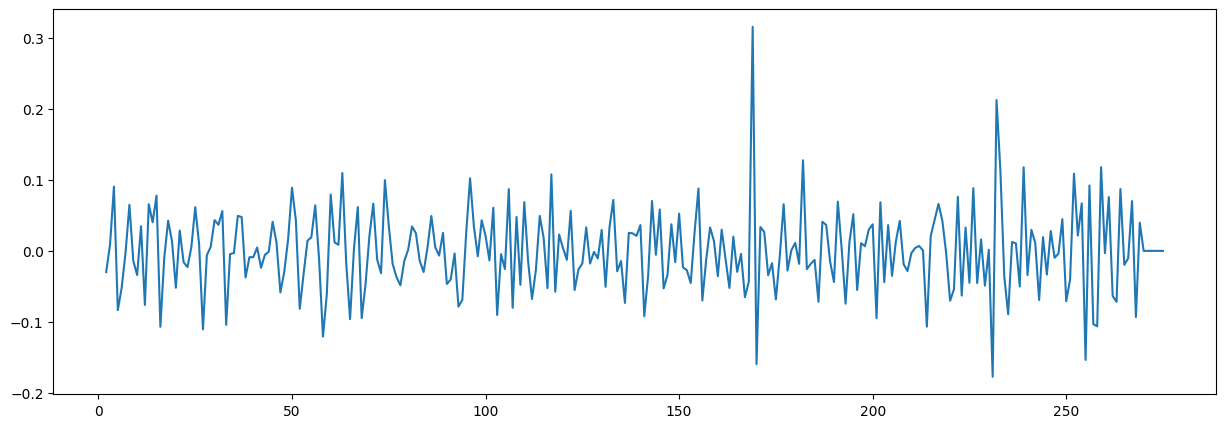

In [823]:
plt.plot(data_transformation_log.diff().diff())

In [824]:
data_transformation_log_diff = data_transformation_log.diff().diff()
data_transformation_log_diff.dropna(inplace = True)
tsa_acf = acf(data_transformation_log_diff,nlags=5,fft=False)
tsa_pacf = pacf(data_transformation_log_diff, nlags=36)
tsa_acf

array([ 1.        , -0.26408051, -0.16118958, -0.08131975, -0.03130114,
        0.04813617])

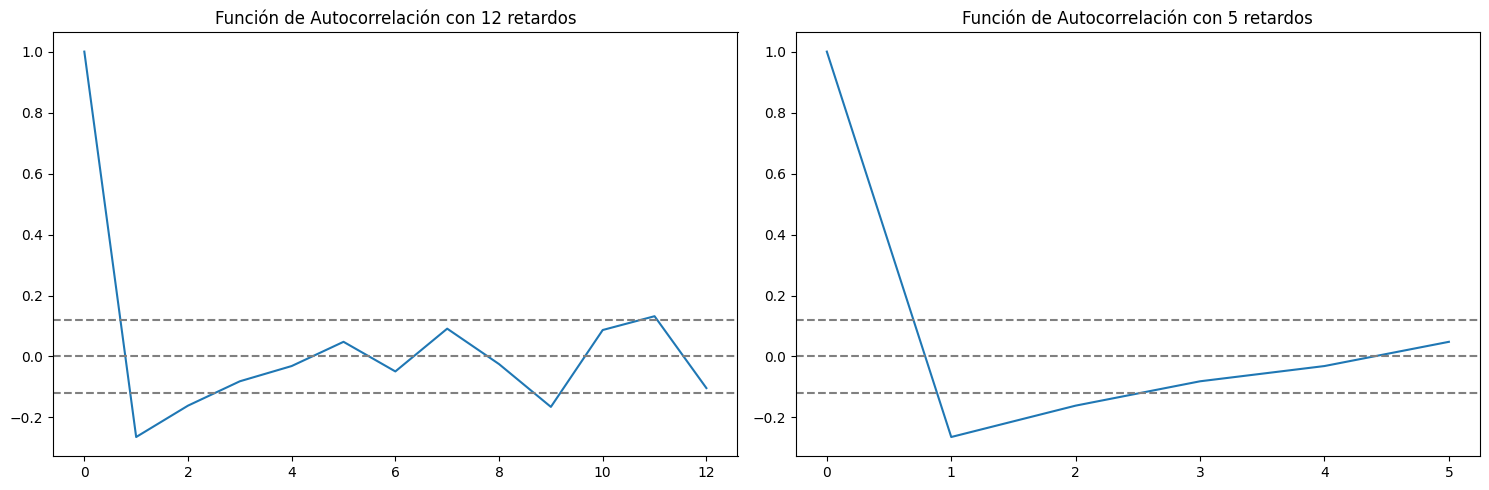

In [825]:

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(data_transformation_log_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(data_transformation_log_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

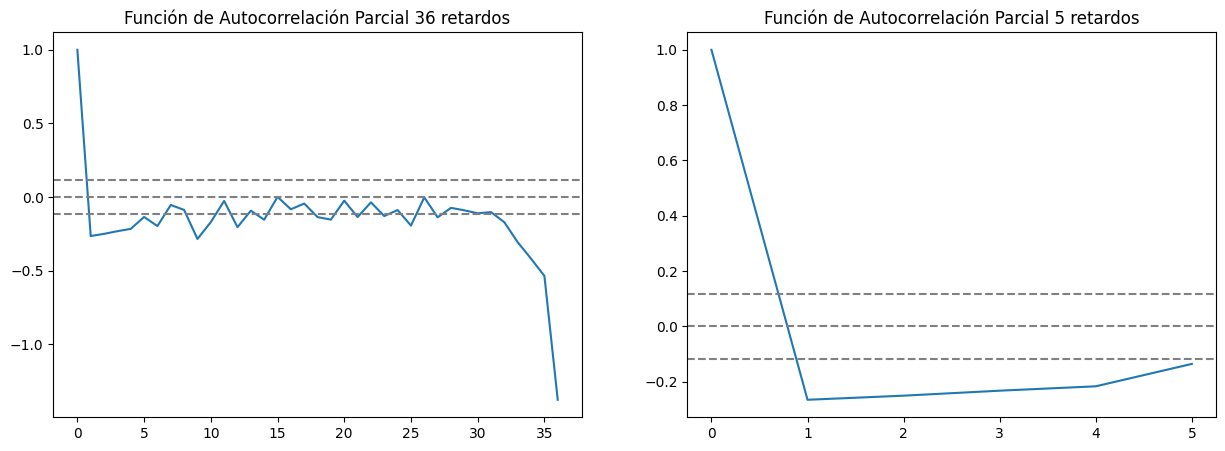

In [826]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(data_transformation_log_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(data_transformation_log_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

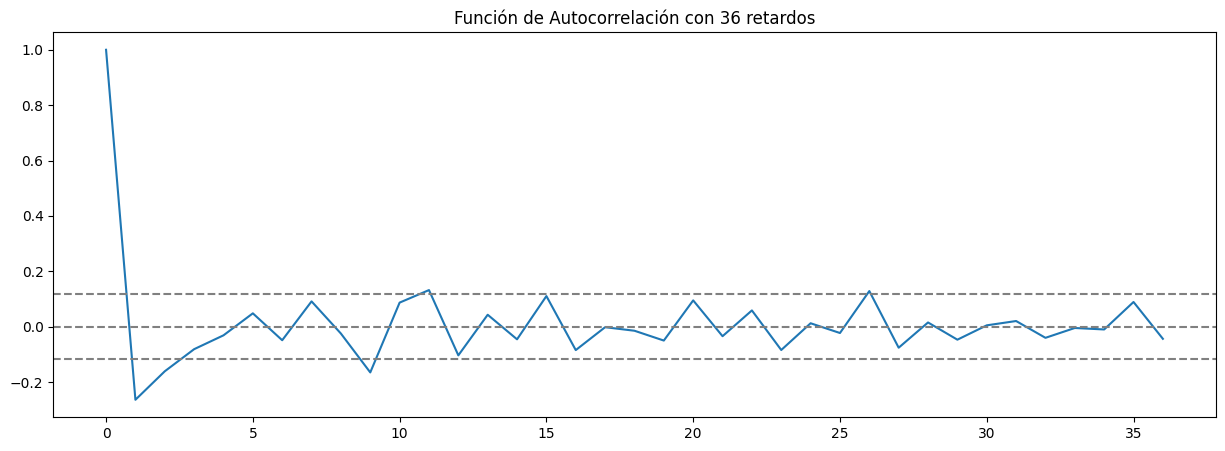

In [827]:
plt.plot(acf(data_transformation_log_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [828]:
data_transformation_log_D = data_transformation_log.diff(12)
data_transformation_log_D.dropna(inplace=True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

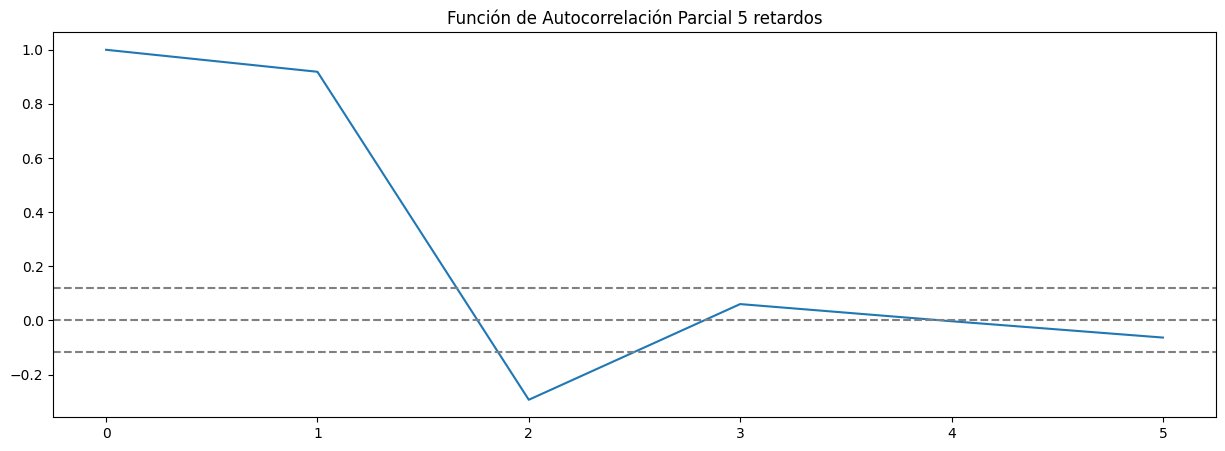

In [829]:
plt.plot(pacf(data_transformation_log_D, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

In [830]:
modelo121 = SARIMAX(data_transformation_log, order=(1,2,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m121 = modelo121.fit()
print(resultado_m121.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2591      0.058      4.486      0.000       0.146       0.372
ma.L1         -1.0000     27.058     -0.037      0.971     -54.032      52.032
ar.S.L12      -0.7185      0.061    -11.697      0.000      -0.839      -0.598
ar.S.L24      -0.3704      0.060     -6.194      0.000      -0.488      -0.253
sigma2         0.0029      0.079      0.037      0.971      -0.153       0.158


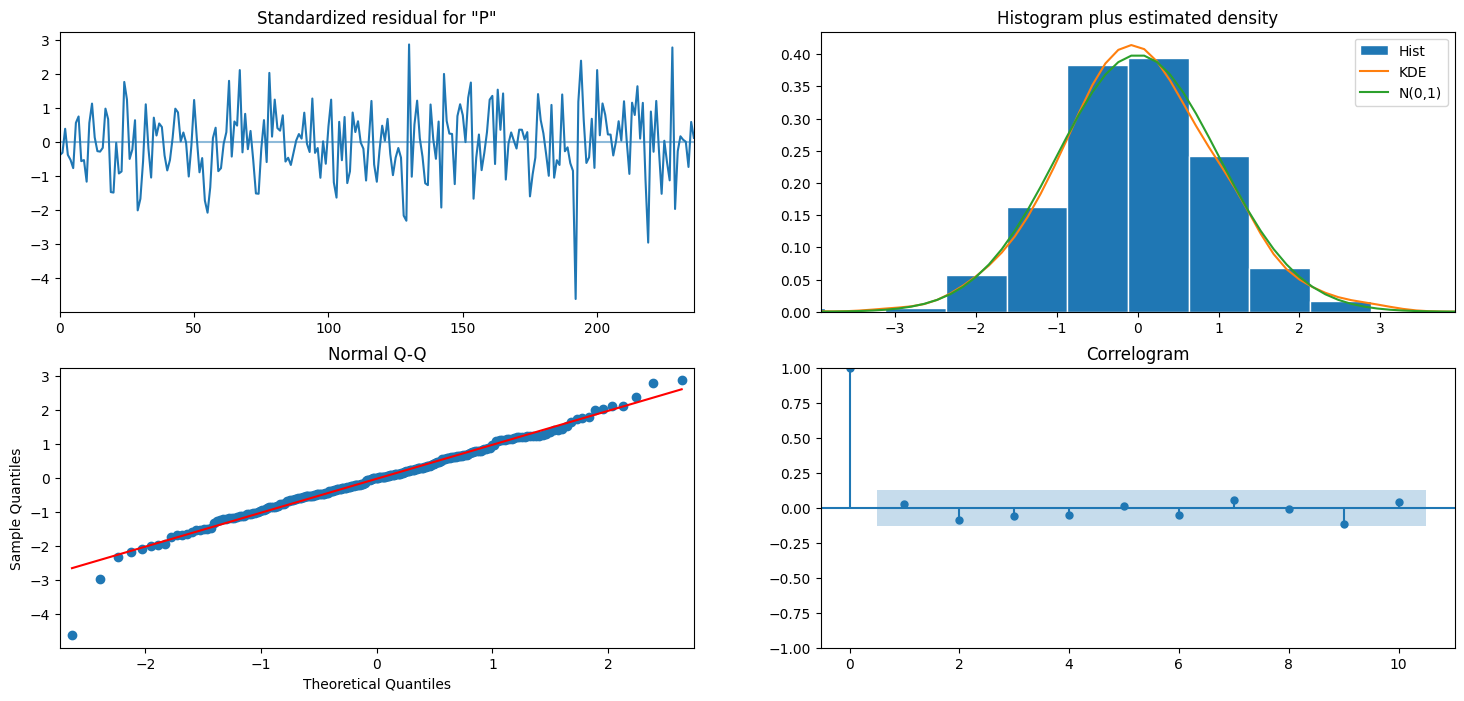

In [831]:
resultado_m121.plot_diagnostics(figsize=(18, 8))
plt.show()

In [832]:
modelo221 = SARIMAX(data_transformation_log, order=(2,2,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m221 = modelo221.fit()
print(resultado_m221.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2892      0.058      5.015      0.000       0.176       0.402
ar.L2         -0.1058      0.061     -1.747      0.081      -0.225       0.013
ma.L1         -1.0000     24.502     -0.041      0.967     -49.023      47.023
ar.S.L12      -0.7284      0.064    -11.458      0.000      -0.853      -0.604
ar.S.L24      -0.3619      0.061     -5.906      0.000      -0.482      -0.242
sigma2         0.0029      0.071      0.041      0.967      -0.137       0.143


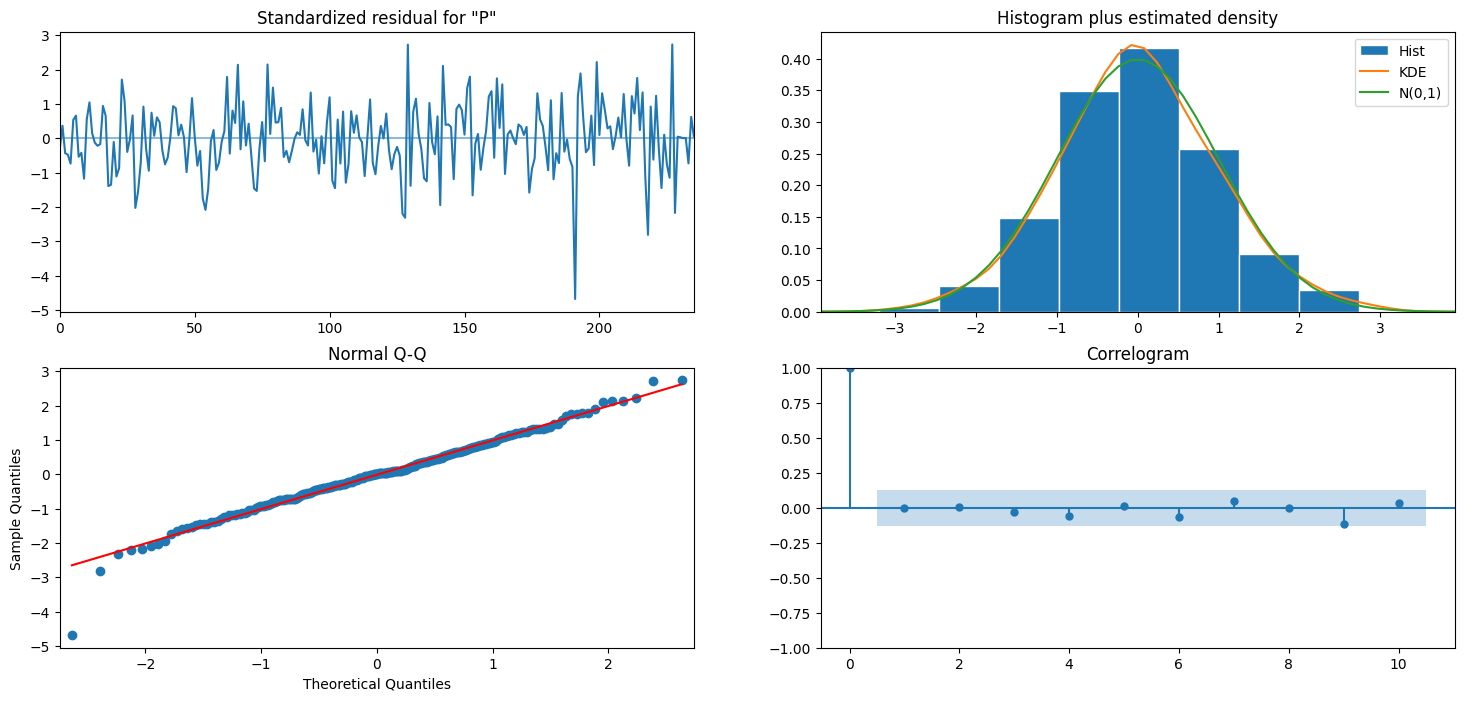

In [833]:
resultado_m221.plot_diagnostics(figsize=(18, 8))
plt.show()

In [834]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 121=",resultado_m121.aic)
print("Modelo 221=",resultado_m221.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 121=",resultado_m121.bic)
print("Modelo 221=",resultado_m221.bic)

Resultados de AIC (Akaike information criterion)
Modelo 121= -695.0311678942965
Modelo 221= -692.093562554902
Resultados de BIC (Bayesian information criterion)
Modelo 121= -677.6908671886208
Modelo 221= -671.3105717247483


In [835]:
test_airPas.index[0]

9

In [838]:
pred = resultado_m121.get_prediction(start=test_airPas.index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = data['2002':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
# ax.fill_between( pred_ci.iloc[:,0],
#                 pred_ci.iloc[:,1], color='k', alpha=.2)
# #ax.set_xlabel('Date')
# #ax.set_ylabel('Retail_sold')
# plt.legend()
# plt.show()

# pred

TypeError: cannot do slice indexing on RangeIndex with these indexers [2002] of type str